<a href="https://www.kaggle.com/code/avinashrola/rome-weather-image-classification?scriptVersionId=107809356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rome-weather-classification/Rome Weather/Sunny/download (9).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (2).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (4).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/download (3).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (13).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (39).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/download (8).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (9).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (22).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (5).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (19).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (10).jpg
/kaggle/input/rome-weather-classification/Rome Weather/Sunny/images (23).jpg


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

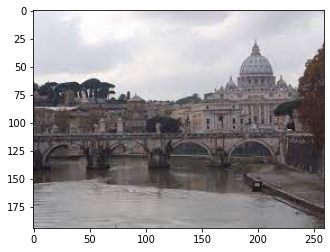

In [3]:
image = plt.imread('../input/rome-weather-classification/Rome Weather/Cloudy/download (1).jpg')
img = plt.imshow(image)

In [4]:
image.shape

(194, 259, 3)

In [5]:
label = []
image = []
img_width = 150
img_height = 150

for i in os.listdir('../input/rome-weather-classification/Rome Weather/'):
    for j in os.listdir('../input/rome-weather-classification/Rome Weather/'+i):
        img = cv2.imread('../input/rome-weather-classification/Rome Weather/'+i+'/'+j)
        img = cv2.resize(img, (img_height,img_width))
        label.append(i)
        image.append(img)
        
        
x = np.array(image)
y = np.array(label)



In [6]:
image = tf.cast(image, tf.float32)

2022-10-12 05:51:51.020022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 05:51:51.114532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 05:51:51.115303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-12 05:51:51.118969: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
x.shape, y.shape

((250, 150, 150, 3), (250,))

In [8]:
le = LabelEncoder()

y = le.fit_transform(y)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Data Augmentation

In [12]:
aug = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip(),
    keras.layers.experimental.preprocessing.RandomRotation(0.4),
    keras.layers.experimental.preprocessing.RandomContrast(0.4)
])

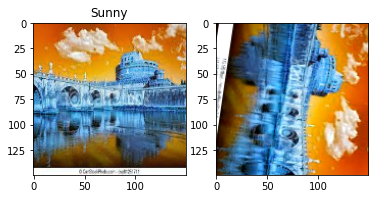

In [13]:
# Orignal Image
plt.subplot(1,2,1)
plt.imshow(x[0])
plt.title(label[0])

# Data Agumentation Applied Image
plt.subplot(1,2,2)
plt.imshow(aug(x)[0])

In [14]:
# Model

In [15]:
model = Sequential([
    aug,
    Conv2D(16, (3,3), padding='same', activation='relu', input_shape = (150, 150, 3)),
#     Conv2D(16, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
#     Dropout(0.2),
    
    Conv2D(32, (3,3), padding='same', activation='relu'),
#     Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    
   
    
    Flatten(),
    Dense(150,activation='relu'),
    Dropout(0.15),
    Dense(5,activation='softmax')
    
])


In [16]:
optimizer = RMSprop(learning_rate=0.001, rho=0.6, epsilon=1e-08, decay=0.0)

In [17]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
x_train.shape, y_train.shape

((200, 150, 150, 3), (200,))

In [19]:
history = model.fit(x_train,y_train,epochs = 150, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=3)

2022-10-12 05:52:02.009873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-10-12 05:52:04.017690: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3/3 [==============================] - 8s 258ms/step - loss: 14.3028 - accuracy: 0.1800 - val_loss: 9.6932 - val_accuracy: 0.2000
Epoch 2/150
3/3 [==============================] - 0s 58ms/step - loss: 7.9049 - accuracy: 0.2200 - val_loss: 4.2061 - val_accuracy: 0.2000
Epoch 3/150
3/3 [==============================] - 0s 55ms/step - loss: 2.9253 - accuracy: 0.2350 - val_loss: 1.8789 - val_accuracy: 0.2000
Epoch 4/150
3/3 [==============================] - 0s 50ms/step - loss: 1.7675 - accuracy: 0.2150 - val_loss: 1.8974 - val_accuracy: 0.2000
Epoch 5/150
3/3 [==============================] - 0s 49ms/step - loss: 1.7657 - accuracy: 0.2600 - val_loss: 1.4397 - val_accuracy: 0.3600
Epoch 6/150
3/3 [==============================] - 0s 40ms/step - loss: 1.5433 - accuracy: 0.3200 - val_loss: 1.3908 - val_accuracy: 0.4400
Epoch 7/150
3/3 [==============================] - 0s 37ms/step - loss: 1.5294 - accuracy: 0.3250 - val_loss: 1.6805 - val_accuracy: 0.2000
Epoch 8/150
3/3 [=============

In [20]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 1.1416 - accuracy: 0.5800


[1.141615629196167, 0.5799999833106995]

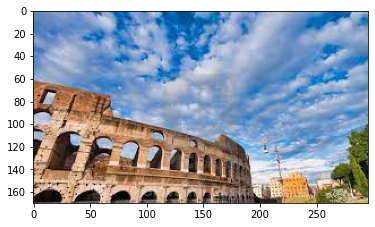

In [21]:
whether_img=plt.imread("../input/rome-weather-classification/Rome Weather/Sunny/download (2).jpg")
plt.imshow(whether_img)
plt.show()

In [22]:
whether_img=cv2.resize(whether_img,(150,150))
whether_img = whether_img/255

In [23]:
x=tf.keras.preprocessing.image.array_to_img(whether_img)
x=np.expand_dims(x,axis=0)

In [24]:
model.predict(x)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
whether=['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']
pridicted_whether=whether[np.argmax(model.predict(x)[0])]
pridicted_whether

'Sunny'